In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
import os
from keras.models import model_from_json

In [5]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [6]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [7]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(pool_size=2, strides = 2), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(pool_size=2, strides = 2), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

C:\Users\Mon PC\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [23]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9960 - val_loss: 0.0155
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9980 - val_loss: 0.0071
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9960 - val_loss: 0.0136
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9978 - val_loss: 0.0066
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9977 - loss: 0.0081 - val_accuracy: 0.9966 - val_loss: 0.0096


In [24]:
lenet_5_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0531


[0.04302654042840004, 0.9879000186920166]

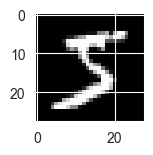

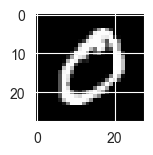

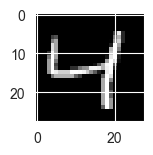

In [25]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [26]:
lenet_5_model.save('lenet_5_model.keras')
print(os.listdir('.'))

['exported_weights', 'fashionmnist_model.json', 'FashionMNIST_weights.weights.h5', 'LeNet5.ipynb', 'lenet_5_model.h5', 'lenet_5_model.keras', 'my.h5', 'my.keras', 'printMNIST.cu', 'ressources.zip', 'train-images.idx3-ubyte']


In [27]:
lenet_5_model.save("my.keras")

In [28]:
lenet_5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [29]:
json_model = lenet_5_model.to_json()

In [30]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [31]:
lenet_5_model.save_weights('FashionMNIST_weights.weights.h5')

In [32]:
os.makedirs("exported_weights", exist_ok=True)

for i, layer in enumerate(lenet_5_model.layers):
    w = layer.get_weights()
    for j, arr in enumerate(w):
        flat_arr = arr.flatten()

        filename = f"layer_{i}_{j}.txt"
        filepath = os.path.join("exported_weights", filename)


        np.savetxt(filepath, flat_arr, fmt='%.9f')

        print(f"Saved shape {arr.shape} to {filepath} with total elements {flat_arr.size}")

Saved shape (5, 5, 1, 6) to exported_weights\layer_0_0.txt with total elements 150
Saved shape (6,) to exported_weights\layer_0_1.txt with total elements 6
Saved shape (5, 5, 6, 16) to exported_weights\layer_2_0.txt with total elements 2400
Saved shape (16,) to exported_weights\layer_2_1.txt with total elements 16
Saved shape (400, 120) to exported_weights\layer_5_0.txt with total elements 48000
Saved shape (120,) to exported_weights\layer_5_1.txt with total elements 120
Saved shape (120, 84) to exported_weights\layer_6_0.txt with total elements 10080
Saved shape (84,) to exported_weights\layer_6_1.txt with total elements 84
Saved shape (84, 10) to exported_weights\layer_7_0.txt with total elements 840
Saved shape (10,) to exported_weights\layer_7_1.txt with total elements 10


In [33]:
with open('fashionmnist_model.json', 'r') as json_file:
    json_model = json_file.read()
json_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 6, "kernel_size": [5, 5], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "tanh", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializer

In [34]:
weights = lenet_5_model.load_weights('FashionMNIST_weights.weights.h5')
weights_names = [weight.name for weight in lenet_5_model.weights]


In [35]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-0.17452338,  0.28827026, -0.02634743, -0.09742   ,
          -0.2040451 ,  0.14631951]],

        [[-0.16654184,  0.14704949, -0.08805483, -0.0844092 ,
          -0.2704496 ,  0.1338337 ]],

        [[ 0.32177734, -0.26174545,  0.19592848, -0.35125986,
          -0.4739847 , -0.07570743]],

        [[ 0.17475025, -0.582962  ,  0.45446134, -0.22140206,
          -0.36686212,  0.07267389]],

        [[-0.33252954, -0.39679617,  0.2664059 , -0.4971693 ,
          -0.406371  ,  0.24074458]]],


       [[[ 0.12693562,  0.11719897,  0.05777502, -0.40782785,
          -0.03157824,  0.35978773]],

        [[ 0.89346427, -0.02888431,  0.3374329 , -0.46789435,
           0.12414583,  0.2831564 ]],

        [[ 0.791624  , -0.8308403 ,  0.84246296, -0.36817017,
          -0.16339304,  0.3818516 ]],

        [[ 0.21547027, -0.7812692 ,  0.7296725 , -0.12180714,
           0.20671289,  0.44396853]],

        [[-0.25946617, -0.1716859 ,  0.44709203, -0.02325556,
          -0.1817616 ,  0.1